In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\VIRAJ KAMAT\Desktop\Data Science\Assignments\simple linear regression\delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
#we have to predict delivery time using sorting time.hence y is delivery time and x is sorting time

In [6]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [ ]:
#there is strong correlation between delivery time and sorting time

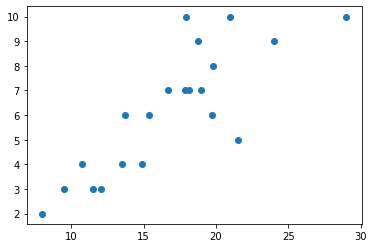

In [9]:
plt.scatter(df['Delivery Time'],df['Sorting Time'])

In [10]:
df=df.rename({'Delivery Time':'DT'},axis=1)

In [12]:
df=df.rename({'Sorting Time':'ST'},axis=1)
df.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
#creating linear regression model

In [14]:
import statsmodels.formula.api as smf

In [15]:
model=smf.ols("DT~ST",data=df).fit()

In [16]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [17]:
(model.tvalues,model.pvalues)

(Intercept    3.823349
 ST           6.387447
 dtype: float64,
 Intercept    0.001147
 ST           0.000004
 dtype: float64)

In [ ]:
# p value is less than 0.05.hence model is significant

In [18]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [ ]:
# from Rsquared value we can say that our model is 66% accurate

# iteration1_square transformation

In [19]:
df['ST2']=df['ST']**2
df.head()

,DT,ST,ST2
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [ ]:
#creating linear regression model

In [30]:
model1=smf.ols("DT~ST2",data=df).fit()

In [31]:
(model1.rsquared,model1.rsquared_adj)

(0.6302871815826637, 0.6108286121922777)

# iteration2_log transformation

In [24]:
df['logST']=np.log(df['ST'])
df.head()

,DT,ST,ST2,logST
0,21.00,10,100,2.302585
1,13.50,4,16,1.386294
2,19.75,6,36,1.791759
3,24.00,9,81,2.197225
4,29.00,10,100,2.302585


In [ ]:
#creating linear regression model

In [25]:
model2=smf.ols("DT~logST",data=df).fit()

In [26]:
(model2.rsquared,model2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [ ]:
# from Rsquared value we can say that our model is 67% accurate.accuracy is increased little with log transformation

# iteration3_sqrt transformation

In [29]:
df['sqrtST']=df['ST']**(1/2)
df.head()

,DT,ST,ST2,logST,sqrtST
0,21.00,10,100,2.302585,3.162278
1,13.50,4,16,1.386294,2.000000
2,19.75,6,36,1.791759,2.449490
3,24.00,9,81,2.197225,3.000000
4,29.00,10,100,2.302585,3.162278


In [ ]:
#creating linear regression model

In [32]:
model3=smf.ols("DT~sqrtST",data=df).fit()

In [33]:
(model3.rsquared,model3.rsquared_adj)

(0.6958062276308671, 0.6797960290851233)